<a href="https://colab.research.google.com/github/sui16/airbnb-data-anaylsis/blob/main/Teams_Collab_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

##This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.


## **Table of content**
Loading Data

1.   Loading Data & Importing Libraries
2.   More about the Data
3.   Analysis



## **Explore and analyze the data in differt ways.**<br>
1) Total number of Properties in each neighbourhood group(Location.)<br>
2) Total number of reviews in each neighbourhood groups(Location).<br>
3) Average Price of the properties in each neighbourhood groups(Location).<br>
4) Total number of Properties of each room type in different neighbourhood groups.<br>
5) Average Price of each room type at different locations.<br>
6) Total number of Hosts that provides Minimum night stays.<br>
7) Lets see how the price column is distributed over every room type and there are any suprising items in price column?<br>
8) Now lets check the highest price with availability, reviews per month, last review & neighbourhood group?<br>
9) Which typer of room is booked more in all the geography location and why?<br>
10) Which host are the busiest and why?<br>
11) Which location do the customers pay the highest and lowest rent?<br>
12) Which are the top 10 neighbourhood which are having maximum number of appartments for airbnb?<br>


## **Import the Libraries and Uploading the Data**

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#mounting drive for data set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Data File
file_path = '/content/drive/MyDrive/EDA Project/Airbnb NYC 2019.csv'
airbnb_data_df = pd.read_csv(file_path )

## **More About The Data**

In [ ]:
#Viewing Top 5 data
airbnb_data_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [ ]:
#Viewing Bottom 5 data
airbnb_data_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#getting shape of data ROW & COLUMN
print(airbnb_data_df.shape)

(48895, 16)


In [ ]:
#Viewing all the columns
print("Name of Columns:")
airbnb_data_df.columns

Name of Columns:


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

As we can see from the .shape method there are total:

Number of rows is 48895
Number of columns is 16

id- unique id for every record.<br>
name- name of the host listing.<br>
host_id- unique id given to the host.<br>
host_name- name of the host(owner).<br>
neighbourhood_group- it could be a city/location.<br>
neighbourhood- particular area in respective neighbourhood group.<br>
latitde- horizantal co-ordinates for respective host.<br>
longitude- vertical co-ordinates for respective host.<br>
room_type- Type of room.<br>
price- price charged by host.<br>
minimum_nights- it is the minimum nights for which booking should be done.<br>
number_of_reviews- total reviews given to the host.<br>
last_review- last review given by a customer to the host.<br>
reviews_per_month- its average reviews given by customer to the host per month.<br>
calculated_host_listings_count- total listing count of a particular host.<br>
availability_365- host available in a year given in number of days.<br>

In [ ]:
airbnb_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

So as you can see from the above info there are 48895 entries with 16 columns and there is no null vale in the given dataframe. Also it shows the data type of the given columns. We have 3 different datatype float64, int64, object 
  

*   3 columns have float64 as data type (latitude, longitude & review_per_month)
*   7 Columns have int64 as data type (id, host_id, price, minimum_nights, number_of_reviews, calculated_host_listings_count & availability_365)
*   6 columns have object as data type (name, host_name, neighbourhood_group, neighbourhood, room_type & last_review)

In [ ]:
#To count the null values in every column
airbnb_data_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From above details we can see that there are 16 null values in 'name', 21 in 'host_name' and 10052 each in 'last_review' and 'reviews_per_month'

In [ ]:
#Viewing the description of DataFrame for insight
airbnb_data_df.describe(include = 'all')    #here we use include = 'all' to see the description of data which also not include numbers.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47896,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,6/23/2019,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


As we can see from the above describe data the minimum price value is 0 which is not possible.

In [ ]:
##Filling the price value with appropriate data
airbnb_data_df.loc[ (airbnb_data_df.room_type=='Entire home/apt') & (airbnb_data_df.price==0),'price']=airbnb_data_df.loc[ (airbnb_data_df.room_type=='Entire home/apt') & (airbnb_data_df.price!=0),'price'].median()
airbnb_data_df.loc[ (airbnb_data_df.room_type=='Private room') & (airbnb_data_df.price==0),'price']=airbnb_data_df.loc[ (airbnb_data_df.room_type=='Private room') & (airbnb_data_df.price!=0),'price'].median()
airbnb_data_df.loc[ (airbnb_data_df.room_type=='Shared room') & (airbnb_data_df.price==0),'price']=airbnb_data_df.loc[ (airbnb_data_df.room_type=='Shared room') & (airbnb_data_df.price!=0),'price'].median()

In [ ]:
#Viewing the description of DataFrame for insight
airbnb_data_df.describe(include = "all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47896,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,6/23/2019,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.739094,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.146276,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,10.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


As we can see we have sucessfully updated the price column where we have values as 0.<br>
And now We can analyse from the above description that the minimum price is 10 and max is can go upto 10000.

In [ ]:
#viewing the unique value in the DataFrame
print("Unique Dataset:")
airbnb_data_df.nunique()

Unique Dataset:


id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               673
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

Corelation matrix

In [ ]:
#viewing Corelation between columns
corelation = airbnb_data_df.corr()

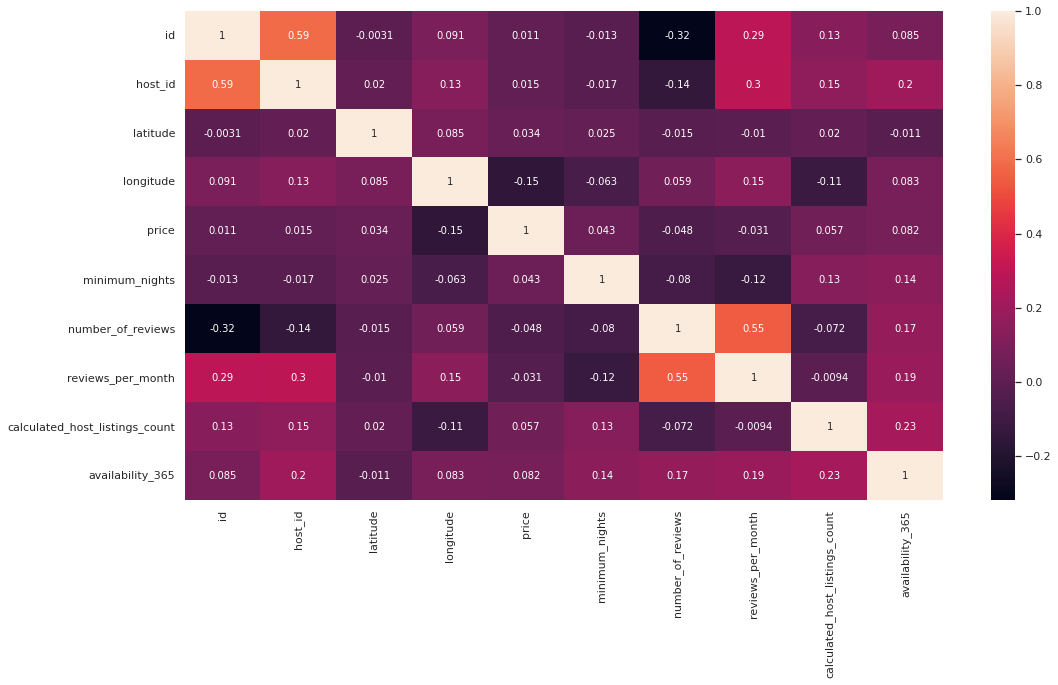

In [ ]:
#Making Heatmap
plt.figure(figsize=(17,9))
sns.heatmap(corelation,  xticklabels = corelation.columns, yticklabels = corelation.columns, annot =True)

Heat map showing Relations between the columns

## Q-1) Number of Properties in each neighbourhood group(Location)

In [ ]:
property_count=airbnb_data_df['neighbourhood_group'].value_counts().reset_index()
property_count

,index,neighbourhood_group
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


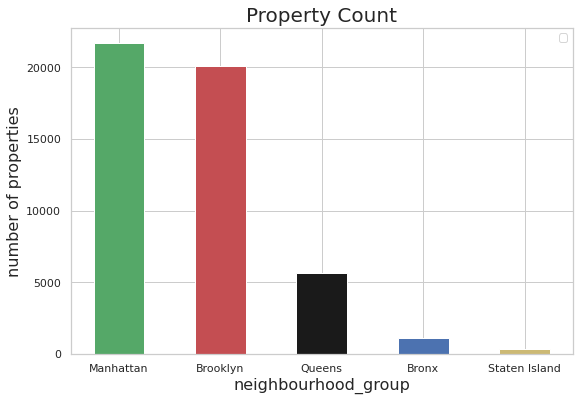

In [ ]:
w=0.5
plt.figure(figsize=(9,6))
bar_y=np.arange(5)
plt.bar(bar_y,property_count['neighbourhood_group'],w,color='grkby')
plt.xlabel('neighbourhood_group',size=16)
plt.ylabel('number of properties',size=16)
plt.title('Property Count',size=20)
plt.xticks(bar_y,property_count['index'])
plt.legend()
plt.show()


From above graph we conclude that Mahattan and Brooklyn has maximum number of properties may be the reason is more demands at these locations.

## Q-2) Total number of reviews in each neighbourhood groups(Location)

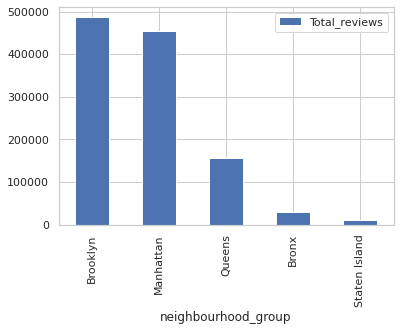

In [ ]:
pd.DataFrame(airbnb_data_df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False)).rename({'number_of_reviews':'Total_reviews'},axis=1).plot.bar()

We conclude that Brooklyn and Manhattan has most number of reviews whereas staten island has least reviews may be because people not preffered this location may be because it is not developed that much.

## Q-3) Average Price of the properties in each neighbourhood groups(Location)

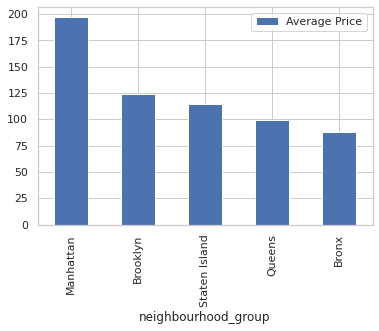

In [ ]:
pd.DataFrame(airbnb_data_df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)).rename({'price':'Average Price'},axis=1).plot.bar()

We see that in Manhattan the average price of the properties is higher may be because of the demand.

## Q-4) Total number of Properties of each room type in different neighbourhood groups.

In [ ]:
r=airbnb_data_df.groupby('neighbourhood_group')['room_type'].value_counts().unstack()
r

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


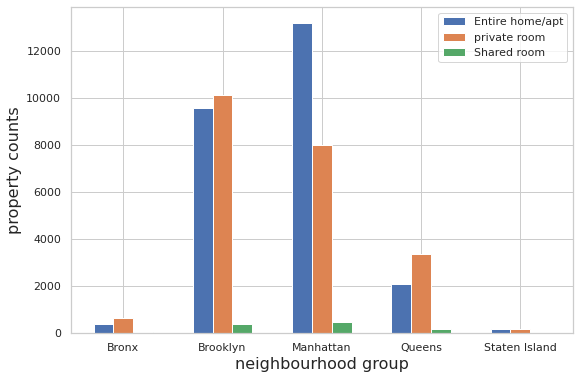

In [ ]:
plt.figure(figsize=(9,6))
w=0.2
bar_a=np.arange(5)
bar_b=[w+i for i in bar_a]
bar_c=[w+i for i in bar_b]
plt.bar(bar_a,list(r['Entire home/apt']),w,label='Entire home/apt')
plt.bar(bar_b,list(r['Private room']),w,label='private room')
plt.bar(bar_c,list(r['Shared room']),w,label='Shared room')
plt.xlabel('neighbourhood group',size=16)
plt.ylabel('property counts',size=16)
plt.xticks(bar_a+w,r.index)
plt.legend()
plt.show()

As we see that in Brooklyn and Manhattan their are more properties that offer entire room/apt may be because mostly people came for travelling purpose with their family.The shared room is least offered.

## Q-5) Average Price of each room type at different locations

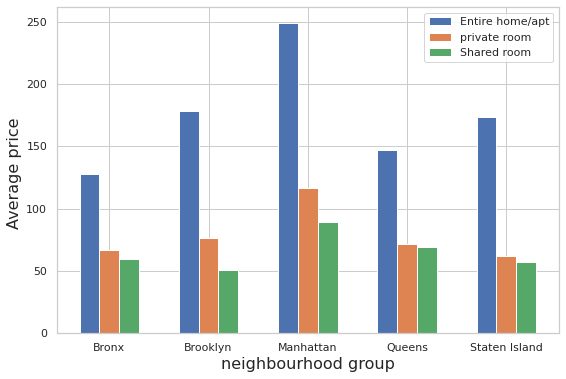

In [ ]:
r=airbnb_data_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
plt.figure(figsize=(9,6))
w=0.2
bar_a=np.arange(5)
bar_b=[w+i for i in bar_a]
bar_c=[w+i for i in bar_b]
plt.bar(bar_a,list(r['Entire home/apt']),w,label='Entire home/apt')
plt.bar(bar_b,list(r['Private room']),w,label='private room')
plt.bar(bar_c,list(r['Shared room']),w,label='Shared room')
plt.xlabel('neighbourhood group',size=16)
plt.ylabel('Average price ',size=16)
plt.xticks(bar_a+w,r.index)
plt.legend()
plt.show()

## Q-6) Total number of Hosts that provides Minimum night stays 

In [ ]:
#First we make the minimum night category.
def minimum_night_category(x):
  if x==1:
    return 'one day'
  if x>1 and x<=3:
    return '2-3 days'
  if x>3 and x<7:
    return 'few days'
  if x==7:
    return '1 week'
  elif x>7 and x<=29:
    return 'less than a month'
  elif x==30:
    return '1 month'
  elif x>30 and x<180:
    return 'more than a month'
  elif x>=180 and x<=365:
    return 'more than half year'
  elif x>365:
    return 'more than a year'  

#Creating a new column for the minimum night categories.
airbnb_data_df['minimum_night_category']=airbnb_data_df['minimum_nights'].apply(minimum_night_category)

In [ ]:
#Now make a Dataframe of the minimum night category and its total number of hosts.
d=pd.DataFrame(airbnb_data_df.groupby('minimum_night_category')['id'].count()).rename({'id':'count'},axis=1).reset_index().sort_values('count',ascending=False)
d

,minimum_night_category,count
2,2-3 days,19695
8,one day,12720
3,few days,7089
0,1 month,3760
4,less than a month,2826
1,1 week,2058
5,more than a month,623
7,more than half year,110
6,more than a year,14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


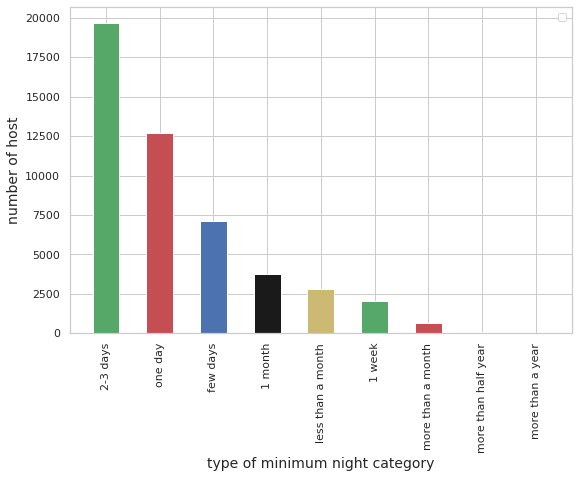

In [ ]:
w=0.5
plt.figure(figsize=(9,6))
bar1=np.arange(9)
plt.bar(bar1,d['count'],w,color='grbky')
plt.xlabel('type of minimum night category',size=14)
plt.ylabel('number of host',size=14)
plt.xticks(bar1,d['minimum_night_category'],rotation=90,fontsize=11)
plt.legend()
plt.show()

**Observations:** 
* From above graph we see that most Hosts provide 2-3 days as minimum night stay.<br>
* Now from the above graph we can say that there are 14 hosts which provide 365 days as minimum nights to stay.

In [ ]:
airbnb_data_df[airbnb_data_df['availability_365']==365]['host_id'].count()

1295

So outof 48895, 1295 number of hosts provide 365 days to stay as minimum.

## Q-7) Lets see how the price column is distributed over every room type and there are any suprising items in price column?

In [ ]:
# from the previous exploration we get to know that price column is having many values as 0 as it doesnt make sense
# so we  will try to get rid of those instances for analysis of price column 
airbnb_df_price=airbnb_data_df[airbnb_data_df['price']!=0].copy()

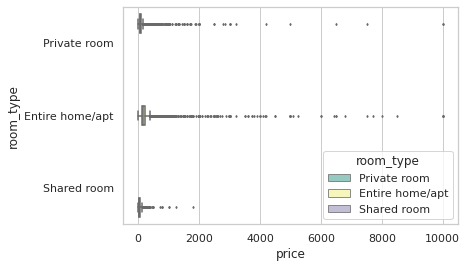

In [ ]:
sns.set_theme(style='whitegrid')
sns.boxplot(y='room_type',x='price',hue='room_type',palette='Set3',linewidth=1.5,fliersize=1.5,data=airbnb_df_price)

From the above box plot we can see there are so many outliers in price.

## Q-8) Now lets check the highest price with availability, reviews per month, last review & neighbourhood group?

In [ ]:
airbnb_data_df[airbnb_data_df['price']==airbnb_data_df['price'].max()][['host_name','reviews_per_month','last_review','availability_365','price','neighbourhood_group']]

,host_name,reviews_per_month,last_review,availability_365,price,neighbourhood_group
9151,Kathrine,0.04,2/13/2016,0,10000,Queens
17692,Erin,0.16,7/27/2017,0,10000,Brooklyn
29238,Jelena,NaN,NaN,83,10000,Manhattan


**Observation:**

Kathrine And Erin Have High Price And Ther Is Also Low Availibity
The Reviews Are Also Less As Many People Might Not Be Able To Stay Due To High Price Or May Be Because There Are No Availibity

Top 5 Hosts that have obtained highest number of reviews.

In [ ]:
host_highest_df=airbnb_data_df.groupby(['host_id','host_name'],as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending = False)
host_highest_df.head(5)

,host_id,host_name,number_of_reviews
21304,37312959,Maya,2273
1052,344035,Brooklyn& Breakfast -Len-,2205
18626,26432133,Danielle,2017
20872,35524316,Yasu & Akiko,1971
21921,40176101,Brady,1818


Top 5 Neighbourhood having highest reviews per month.

In [ ]:
airbnb_data_df.groupby(['neighbourhood'])['reviews_per_month'].max().sort_values(ascending=False).reset_index().head(5)

,neighbourhood,reviews_per_month
0,Theater District,58.50
1,Rosedale,20.94
2,Springfield Gardens,19.75
3,East Elmhurst,16.22
4,Jamaica,15.32


## Q-9) Which typer of room is booked more in all the geography location and why?

In [ ]:
#firstly we will check how many types of room are there
room_types = airbnb_data_df.groupby('neighbourhood_group')['room_type'].value_counts().unstack()
room_types

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


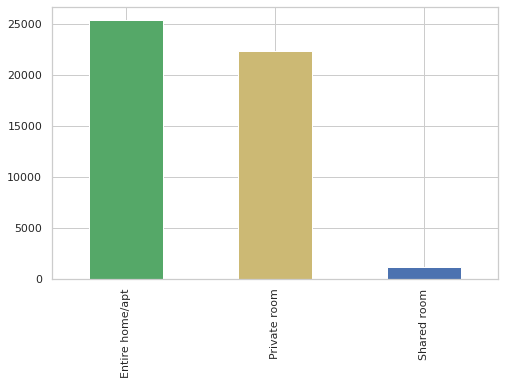

In [ ]:
plt.figure(figsize=(8,5))
airbnb_data_df['room_type'].value_counts().plot(kind='bar',color=['g','y','b'])

Some Of The Observation In Room Type:

* The Maximum Numbers Of Room Are Entire Home/Apartment And Private Room.<br>
* There Are Only Few Shared Rooms.<br>
* So Mostly Host Prefer To Give Entire Home/Appartment Or Private Rooms Rather Than Shared Rooms.<br>

** Average preferred price by customers according to the neighbourhood for each category of Room_type**

In [ ]:
aeverage_price_df = airbnb_data_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
aeverage_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.895706,59.800000
Brooklyn,178.344283,76.541552,50.745763
Manhattan,249.251231,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


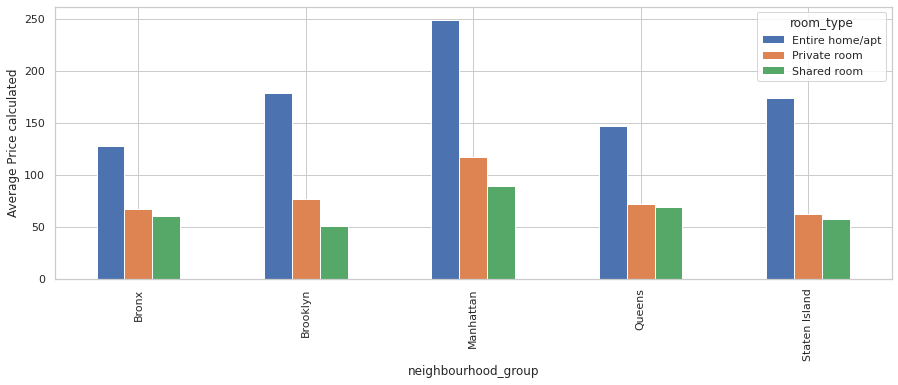

In [ ]:
aeverage_price_df.plot.bar(figsize=(15,5),ylabel='Average Price calculated')

Here we can see the Manhatton is more costly compared to other neighbourhood group and Bronx is the cheapest in the neighbourhood group.

## Q-10) Which host are the busiest and why?

In [ ]:
Name_Host = airbnb_data_df.groupby(['host_name','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
Name_Host

,host_name,room_type,neighbourhood_group,number_of_reviews
0,#NAME?,Entire home/apt,Queens,51
1,'Cil,Private room,Queens,240
2,(Ari) HENRY LEE,Entire home/apt,Manhattan,3
3,(Email hidden by Airbnb),Entire home/apt,Brooklyn,5
4,(Email hidden by Airbnb),Entire home/apt,Manhattan,1
...,...,...,...,...
19144,빈나,Private room,Manhattan,1
19145,소정,Private room,Brooklyn,1
19146,소정,Private room,Manhattan,0
19147,진,Entire home/apt,Manhattan,0


In [ ]:
imp_host = Name_Host.sort_values(by='number_of_reviews',ascending=False).head(10)
imp_host

,host_name,room_type,neighbourhood_group,number_of_reviews
4598,Dona,Private room,Queens,629
8445,Jj,Private room,Manhattan,607
12044,Maya,Private room,Queens,543
2869,Carol,Private room,Manhattan,540
3988,Danielle,Private room,Queens,510
1637,Asa,Entire home/apt,Brooklyn,488
18272,Wanda,Private room,Brooklyn,480
10578,Linda,Private room,Queens,474
3935,Dani,Entire home/apt,Brooklyn,467
1179,Angela,Private room,Queens,466


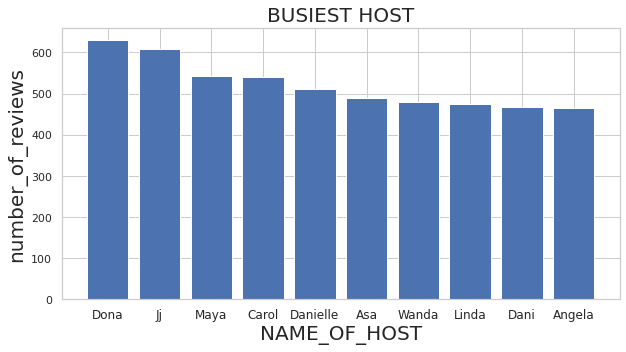

In [ ]:
#Using matplotlib library for ploting the chart for easy understanding
hosts = imp_host['host_name']
reviews = imp_host['number_of_reviews']
fig = plt.figure(figsize = (10,5))

#creating bar chart

plt.bar(hosts,reviews)
plt.xlabel('NAME_OF_HOST', fontsize=20)
plt.ylabel('number_of_reviews', fontsize=20)
plt.title('BUSIEST HOST', fontsize=20)
plt.xticks(fontsize='12')
plt.show()

Observation:
After analysing the data we can clearly see that the top 5 busiest host are Dona, Jj, Maya, Carol & Danielle.

So the question is why these hosts are the busiest host among all.

In [ ]:
#Get the value count for room_type
pd.DataFrame(imp_host['room_type'].value_counts())

,room_type
Private room,8
Entire home/apt,2


In [ ]:
#Top 5 Hosts location and minimum price.
imp_host_df = airbnb_data_df[(airbnb_data_df.loc[:,'host_name']=='Dona') | (airbnb_data_df.loc[:,'host_name']=='Jj') | (airbnb_data_df.loc[:,'host_name']=='Maya') | (airbnb_data_df.loc[:,'host_name']=='Carol') | (airbnb_data_df.loc[:,'host_name']=='Danielle')]
imp_host_min_price_df = imp_host_df.groupby(['host_name','price','room_type','neighbourhood_group'])['minimum_nights'].min().reset_index().sort_values(by=['minimum_nights','price']).set_index('host_name').reset_index().loc[[0,1,2,7,11]]
imp_host_min_price_df

,host_name,price,room_type,neighbourhood_group,minimum_nights
0,Maya,32,Private room,Queens,1
1,Carol,35,Private room,Brooklyn,1
2,Danielle,38,Shared room,Queens,1
7,Dona,47,Private room,Queens,1
11,Jj,49,Private room,Manhattan,1


**Observation:**
* Maya offers a private room in Queens neighbourhood at price 32 per night.
* Carol offers a private room in a Brooklyn neighbourhood at price 35 per night.
* Danielle offers a private room in Queens neighbourhood at price 38 per night.
* Dona offers a private room in Queens neighbourhood at price 47 per night.
* Jj offers a private room in Queens neighbourhood at price 49 per night.

## Q-11) For which location do the customers pay the highest and lowest rent?

In [ ]:
#Firstly we get the DataFrame which shows highest price for locations
max_price_per_location = airbnb_data_df.groupby('neighbourhood')['price'].max().reset_index()
max_price = max_price_per_location.sort_values('price',ascending=False).head(20)
max_price

,neighbourhood,price
202,Upper West Side,10000
91,Greenpoint,10000
4,Astoria,10000
119,Lower East Side,9999
61,East Harlem,9999
197,Tribeca,8500
41,Clinton Hill,8000
201,Upper East Side,7703
6,Battery Park City,7500
60,East Flatbush,7500


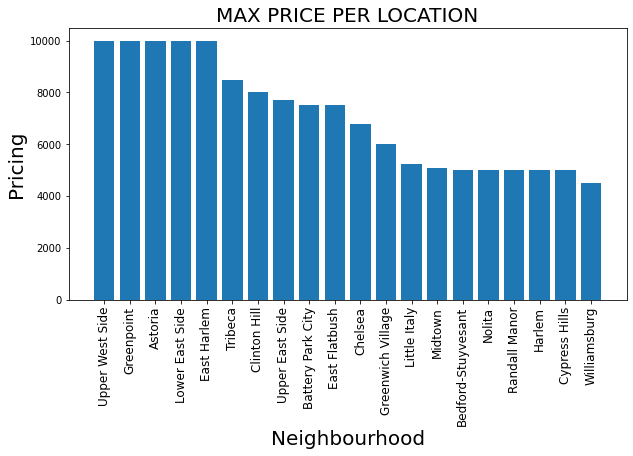

In [ ]:
#Using matplotlib library for ploting the chart for easy understanding
a = max_price['neighbourhood']
b = max_price['price']
fig = plt.figure(figsize = (10,5))

#creating bar chart
plt.bar(a,b)
plt.xlabel('Neighbourhood', fontsize=20)
plt.ylabel('Pricing', fontsize=20)
plt.title('MAX PRICE PER LOCATION', fontsize=20)
plt.xticks(rotation=90,fontsize='12')
plt.show()

In [ ]:
#Top 5 neighbourhoods with highest rent
print("The neighbourhoods with the highest rents are:")
for i in range(5): 
  print(i+1,'.', max_price.iloc[i]['neighbourhood'],'with a price of:',max_price.iloc[i]['price'])

The neighbourhoods with the highest rents are:
1 . Upper West Side with a price of: 10000
2 . Greenpoint with a price of: 10000
3 . Astoria with a price of: 10000
4 . Lower East Side with a price of: 9999
5 . East Harlem with a price of: 9999


In [ ]:
#Now we get the DataFrame which shows lowest price for locations
min_price_per_location = airbnb_data_df.groupby('neighbourhood')['price'].min().reset_index()
min_price = min_price_per_location.sort_values('price',ascending=True).head(20)
min_price

,neighbourhood,price
94,Harlem,10
91,Greenpoint,10
201,Upper East Side,10
202,Upper West Side,10
178,SoHo,10
13,Bedford-Stuyvesant,10
28,Bushwick,10
95,Hell's Kitchen,10
64,East Village,10
190,Sunset Park,10


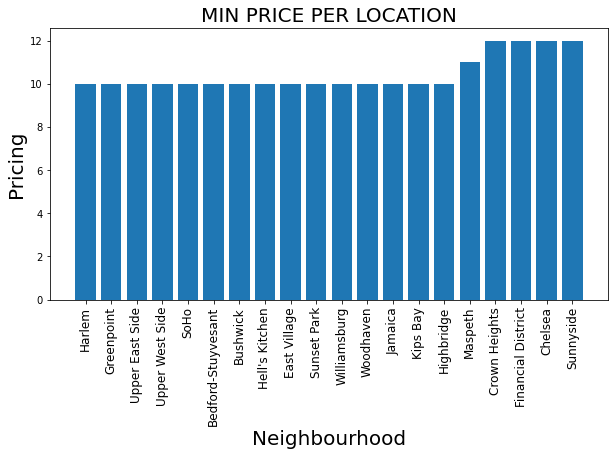

In [ ]:
#Using matplotlib library for ploting the chart for easy understanding
a = min_price['neighbourhood']
b = min_price['price']
fig = plt.figure(figsize = (10,5))

#creating bar chart
plt.bar(a,b)
plt.xlabel('Neighbourhood', fontsize=20)
plt.ylabel('Pricing', fontsize=20)
plt.title('MIN PRICE PER LOCATION', fontsize=20)
plt.xticks(rotation=90,fontsize='12')
plt.show()

In [ ]:
#Top 5 neighbourhoods with Lowest rent
print("The neighbourhoods with the lowest rents are:")
for i in range(5): 
  print(i+1,'.', min_price.iloc[i]['neighbourhood'],'with a price of:',min_price.iloc[i]['price'])

The neighbourhoods with the lowest rents are:
1 . Harlem with a price of: 10
2 . Greenpoint with a price of: 10
3 . Upper East Side with a price of: 10
4 . Upper West Side with a price of: 10
5 . SoHo with a price of: 10


**Observation:**<br>
From the above Code & graph we get to know the maximum & minimum price per locations<br>

## Q-12) Which are the top 10 neighbourhood and neighbourhood_group which are having maximum number of apartments for airbnb?

In [ ]:
#Viewing top 10 neighbourhood
top_10_neighbourhood = airbnb_data_df['neighbourhood'].value_counts()
top_10_neighbourhood.head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

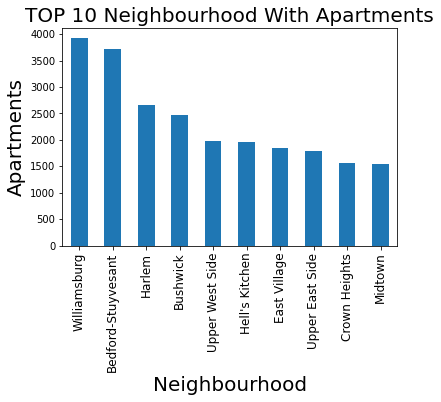

In [ ]:
#ploting graph
a = pd.value_counts(airbnb_data_df['neighbourhood'])[:10]
a.plot.bar()
plt.xlabel('Neighbourhood', fontsize=20)
plt.ylabel('Apartments', fontsize=20)
plt.title('TOP 10 Neighbourhood With Apartments', fontsize=20)
plt.xticks(fontsize = '12')

In [ ]:
#Viewing top 10 neighbourhood_group
top_10_neighbourhood_group = airbnb_data_df['neighbourhood_group'].value_counts()
top_10_neighbourhood_group.head()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

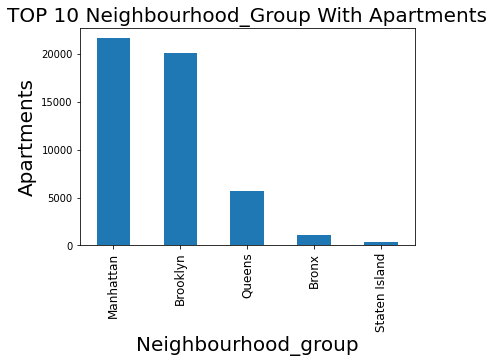

In [ ]:
#ploting graph
a = pd.value_counts(airbnb_data_df['neighbourhood_group'])
a.plot.bar()
plt.xlabel('Neighbourhood_group', fontsize=20)
plt.ylabel('Apartments', fontsize=20)
plt.title('TOP 10 Neighbourhood_Group With Apartments', fontsize=20)
plt.xticks(fontsize = '12')

**Observation:**<br>
From the above graph plot we get to know the total number of apartments in the neighbourhood and neighbourhood_group.<br>
1) In the first graph of question 3 we can see top 10 neighbourhood with total number of apartments out of which these 5 are having the most number of apartments Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, Upper West Side.<br>
2) In the second graph we can see neighbourhood_group with total number of aparments in which Manhattan & Brooklyn have the highest number of apartments.